In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers 


In [2]:
df = pd.read_csv('Classify-2DwLabels-2.txt', sep=',', header=None, names=["Col1", "Col2", "Class"])
df["Class"] = df[["Class"]].replace(0,-1)
df.head()

,Col1,Col2,Class
0,-0.33,-0.62,1
1,0.89,-0.67,-1
2,0.98,-0.26,-1
3,-0.55,0.38,1
4,0.43,0.47,-1


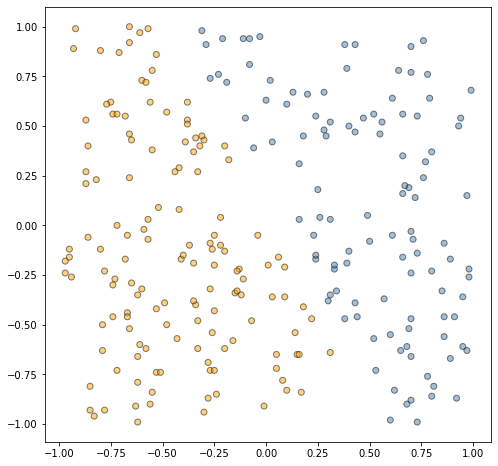

In [3]:
X = df[["Col1", "Col2"]].to_numpy()
y = df[["Class"]].to_numpy()
plt.figure(figsize=(8, 8))
colors = ["steelblue", "orange"]
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), alpha=0.5, cmap=matplotlib.colors.ListedColormap(colors), edgecolors="black")
plt.show()

In [4]:
n = X.shape[0]
H = np.dot(y*X, (y*X).T)
q = np.repeat([-1.0], n)[..., None]
A = y.reshape(1, -1)
b = 0.0
G = np.negative(np.eye(n))
h = np.zeros(n)
A = A.astype('float')

In [5]:
P = matrix(H)
q = matrix(q)
G = matrix(G)
h = matrix(h)
A = matrix(A)
b = matrix(b)

In [6]:
sol = solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol["x"])

     pcost       dcost       gap    pres   dres
 0: -6.4628e+01 -1.4082e+02  9e+02  3e+01  2e+00
 1: -1.5123e+02 -1.5361e+02  4e+02  1e+01  9e-01
 2: -2.5602e+02 -2.3560e+02  4e+02  1e+01  8e-01
 3: -5.0631e+02 -4.3794e+02  4e+02  1e+01  8e-01
 4: -7.1156e+02 -5.6308e+02  5e+02  8e+00  6e-01
 5: -3.8049e+02 -3.3587e+02  4e+02  3e+00  3e-01
 6: -2.4001e+02 -2.4910e+02  2e+01  9e-02  7e-03
 7: -2.4142e+02 -2.4171e+02  7e-01  3e-03  2e-04
 8: -2.4153e+02 -2.4153e+02  7e-03  3e-05  2e-06
 9: -2.4153e+02 -2.4153e+02  7e-05  3e-07  2e-08
10: -2.4153e+02 -2.4153e+02  7e-07  3e-09  2e-10
Optimal solution found.


In [7]:
w = np.dot((y * alphas).T, X)[0]

In [8]:
S = (alphas > 1e-5).flatten()
b = np.mean(y[S] - np.dot(X[S], w.reshape(-1,1)))

In [9]:
print("W:", w)
print("b:", b)

W: [-19.61231471  -9.92018244]
b: 1.0456100344614676


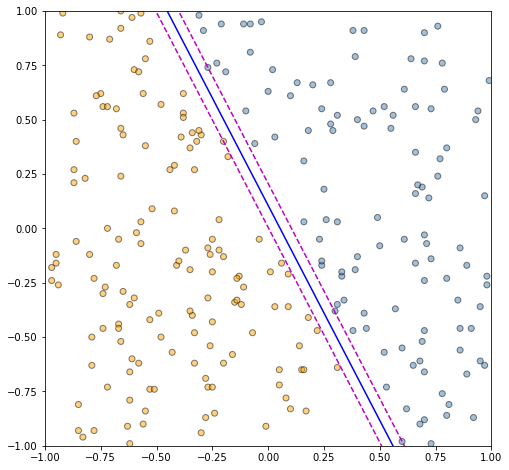

In [10]:
x_min = -1
x_max = 1
y_min = -1
y_max = 1
xx = np.linspace(x_min, x_max)
a = -w[0]/w[1]
yy = a*xx - (b)/w[1]
margin = 1 / np.sqrt(np.sum(w**2))
yy_neg = yy - np.sqrt(1 + a**2) * margin
yy_pos = yy + np.sqrt(1 + a**2) * margin
plt.figure(figsize=(8, 8))
plt.plot(xx, yy, "b-")
plt.plot(xx, yy_neg, "m--")
plt.plot(xx, yy_pos, "m--")
colors = ["steelblue", "orange"]
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), alpha=0.5, cmap=matplotlib.colors.ListedColormap(colors), edgecolors="black")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()